In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp

In [2]:
df=pd.read_csv('../data/cancer_data.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
df=df.set_axis(['gender','age','smoking','yellow_fingers','anxiety','peer_pressure','chronic_disease','fatigue','allergy','wheezing','alcohol_consuming','coughing','shortness_of_breath','swallowing_difficulty','chest_pain','lung_cancer'],
            axis='columns')

In [7]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
columns_to_change=['smoking','yellow_fingers','anxiety','peer_pressure','chronic_disease','fatigue','allergy','wheezing','alcohol_consuming','coughing','shortness_of_breath','swallowing_difficulty','chest_pain','lung_cancer']
columns_to_change

['smoking',
 'yellow_fingers',
 'anxiety',
 'peer_pressure',
 'chronic_disease',
 'fatigue',
 'allergy',
 'wheezing',
 'alcohol_consuming',
 'coughing',
 'shortness_of_breath',
 'swallowing_difficulty',
 'chest_pain',
 'lung_cancer']

In [9]:
df.to_csv('../data/cancer_data_renamed.csv')

In [9]:
for i in columns_to_change:
    df.loc[(df[i] == 1) | (df[i] == 'NO'),i ] = 'yes'
    df.loc[(df[i] == 2) | (df[i] == 'YES'),i] = 'no'



C:\Users\romar\AppData\Local\Temp\ipykernel_6376\26491341.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'yes' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] == 1) | (df[i] == 'NO'),i ] = 'yes'


In [10]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,yes,no,no,yes,yes,no,yes,no,no,no,no,no,no,no
1,M,74,no,yes,yes,yes,no,no,no,yes,yes,yes,no,no,no,no
2,F,59,yes,yes,yes,no,yes,no,yes,no,yes,no,no,yes,no,yes
3,M,63,no,no,no,yes,yes,yes,yes,yes,no,yes,yes,no,no,yes
4,F,63,yes,no,yes,yes,yes,yes,yes,no,yes,no,no,yes,yes,yes


In [11]:
df.isna().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

In [12]:
df.describe()

,age
count,309.000000
mean,62.673139
std,8.210301
min,21.000000
25%,57.000000
50%,62.000000
75%,69.000000
max,87.000000


In [13]:
df.describe( include='object')

,gender,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
count,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,M,no,no,yes,no,no,no,no,no,no,no,no,yes,no,no
freq,162,174,176,155,155,156,208,172,172,172,179,198,164,172,270


In [15]:
df.to_csv('../data/cancer_data_cleaned.csv',index=False)

In [16]:
df['lung_cancer'].value_counts()

lung_cancer
False    270
True      39
Name: count, dtype: int64

<Axes: title={'center': 'age'}, xlabel='gender'>

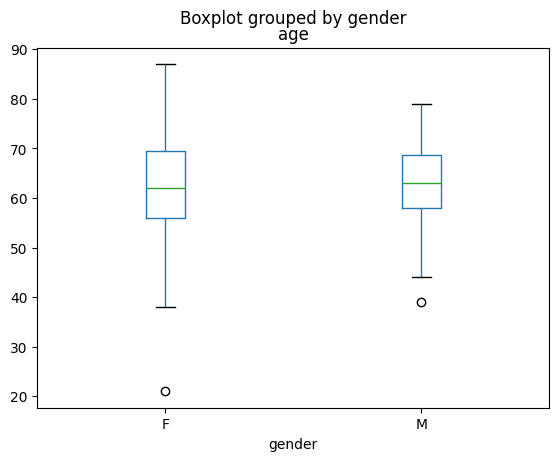

In [17]:
df.boxplot('age','gender',grid=False)

<Axes: title={'center': 'age'}, xlabel='lung_cancer'>

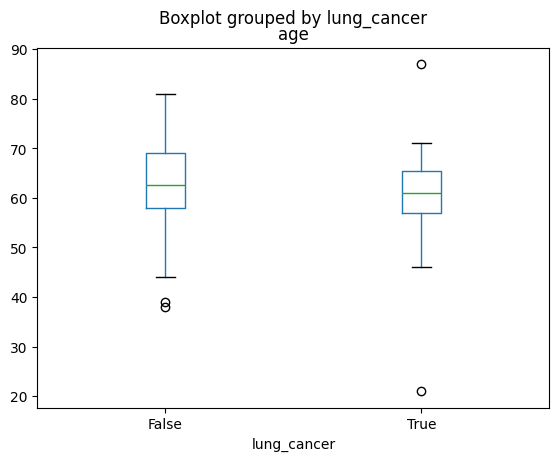

In [18]:
df.boxplot('age','lung_cancer',grid=False)

<Axes: xlabel='yellow_fingers'>

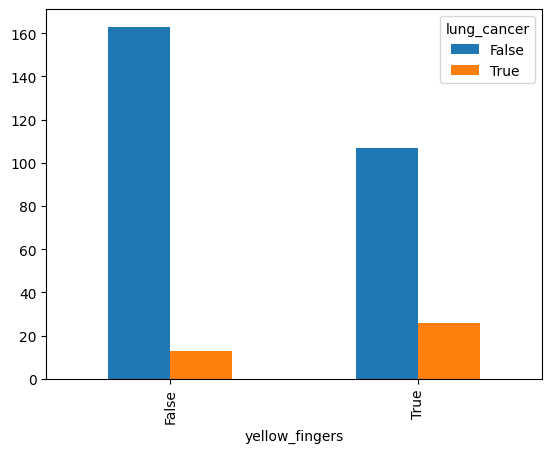

In [19]:
pd.crosstab(df['yellow_fingers'],df.lung_cancer).plot.bar()

In [20]:
from prince import MCA

In [21]:
mca = MCA()
cat_columns=['smoking','yellow_fingers','anxiety','peer_pressure','chronic_disease','fatigue','allergy','wheezing','alcohol_consuming','coughing','shortness_of_breath','swallowing_difficulty','chest_pain']

mca.fit(df[cat_columns])

MCA()

In [22]:
df_mca = mca.transform(df[cat_columns])

<Axes: xlabel='0', ylabel='1'>

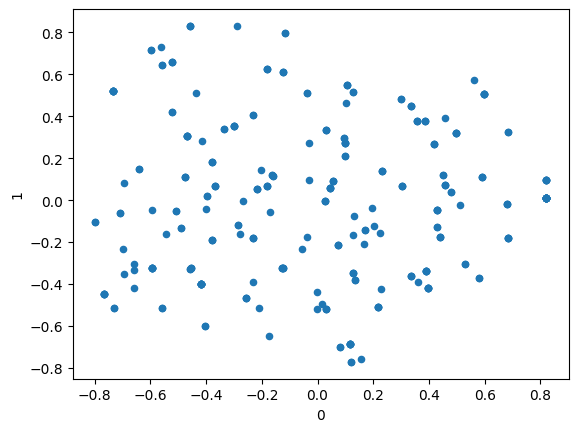

In [23]:
df_mca.plot.scatter(x=0,y=1)

In [24]:
df_final=df.drop(cat_columns,axis=1)
df_final=pd.concat([df_final,df_mca],axis=1)

In [25]:
df_final

,gender,age,lung_cancer,0,1
0,M,69,False,0.045573,0.058097
1,M,74,False,0.128016,-0.167538
2,F,59,True,0.397604,-0.418962
3,M,63,True,-0.524100,0.419761
4,F,63,True,0.135941,-0.379650
...,...,...,...,...,...
304,F,56,False,0.074944,-0.212167
305,M,70,False,0.821523,0.010941
306,M,58,False,0.599198,0.505358
307,M,67,False,0.427261,-0.049258


In [26]:
df_final.to_csv('../data/cancer_data_mca.csv',index=False)